# 可迭代、迭代器、生成器

初学Python的时候，对于这三货真的是傻傻分不清。甚至还认为他们是等价的。

其实，他们是不一样的。

可迭代的对象，很好理解，我们很熟悉的：字符串，list，dict，tuple，deque


为了验证我说的，需要借助collections.abc这个模块（Python2没有），使用isinstance()来类别一个对象是否是可迭代的（Iterable），是否是迭代器（Iterator），是否是生成器（Generator）。

In [1]:
import collections
from collections.abc import Iterable, Iterator, Generator

# 字符串
astr = "XiaoMing"
print("字符串：{}".format(astr))
print(isinstance(astr, Iterable))
print(isinstance(astr, Iterator))
print(isinstance(astr, Generator))

# 列表
alist = [21, 23, 32,19]
print("列表：{}".format(alist))
print(isinstance(alist, Iterable))
print(isinstance(alist, Iterator))
print(isinstance(alist, Generator))

# 字典
adict = {"name": "小明", "gender": "男", "age": 18}
print("字典：{}".format(adict))
print(isinstance(adict, Iterable))
print(isinstance(adict, Iterator))
print(isinstance(adict, Generator))

# deque
adeque=collections.deque('abcdefg')
print("deque：{}".format(adeque))
print(isinstance(adeque, Iterable))
print(isinstance(adeque, Iterator))
print(isinstance(adeque, Generator))

字符串：XiaoMing
True
False
False
列表：[21, 23, 32, 19]
True
False
False
字典：{'name': '小明', 'gender': '男', 'age': 18}
True
False
False
deque：deque(['a', 'b', 'c', 'd', 'e', 'f', 'g'])
True
False
False


> 扩展知识:
可迭代对象，是其内部实现了，\__iter__ 这个魔术方法。
可以通过，dir()方法来查看是否有\__iter__来判断一个变量是否是可迭代的。


接下来是，迭代器。
对比 <span class="burk">可迭代对象</span> ，迭代器其实就只是多了一个函数而已。就是\__next__()，我们可以不再使用for循环来间断获取元素值。而可以直接使用next()方法来实现。

迭代器，是在可迭代的基础上实现的。要创建一个迭代器，我们首先，得有一个可迭代对象。
现在就来看看，如何创建一个可迭代对象，并以可迭代对象为基础创建一个迭代器。

In [2]:
from collections.abc import Iterable, Iterator, Generator

class MyList(object):  # 定义可迭代对象类

    def __init__(self, num):
        self.end = num  # 上边界

    # 返回一个实现了__iter__和__next__的迭代器类的实例
    def __iter__(self):
        return MyListIterator(self.end)


class MyListIterator(object):  # 定义迭代器类

    def __init__(self, end):
        self.data = end  # 上边界
        self.start = 0

    # 返回该对象的迭代器类的实例；因为自己就是迭代器，所以返回self
    def __iter__(self):
        return self

    # 迭代器类必须实现的方法，若是Python2则是next()函数
    def __next__(self):
        while self.start < self.data:
            self.start += 1
            return self.start - 1
        raise StopIteration


if __name__ == '__main__':
    my_list = MyList(5)  # 得到一个可迭代对象
    print(isinstance(my_list, Iterable))  # True
    print(isinstance(my_list, Iterator))  # False
    # 迭代
    for i in my_list:
        print(i)

    my_iterator = iter(my_list)  # 得到一个迭代器
    print(isinstance(my_iterator, Iterable))  # True
    print(isinstance(my_iterator, Iterator))  # True

    # 迭代
    print(next(my_iterator))
    print(next(my_iterator))
    print(next(my_iterator))
    print(next(my_iterator))
    print(next(my_iterator))

True
False
0
1
2
3
4
True
True
0
1
2
3
4


> 扩展知识:
迭代器，是其内部实现了，__next__ 这个魔术方法。(Python3.x)
可以通过，dir()方法来查看是否有__next__来判断一个变量是否是迭代器的。

生成器的概念在 Python 2.2 中首次出现，之所以引入生成器，是为了实现一个在计算下一个值时不需要浪费空间的结构。

前面我们说，迭代器，是在可迭代的基础上，加了一个<span class="burk">next()</span>方法。
而生成器，则是在迭代器的基础上（可以用for循环，可以使用next()），再实现了<span class="burk">yield</span>。

yield 是什么东西呢，它相当于我们函数里的return。在每次next()，或者for遍历的时候，都会yield这里将新的值返回回去，并在这里阻塞，等待下一次的调用。正是由于这个机制，才使用生成器在Python编程中大放异彩。<span class="burk">实现节省内存，实现异步编程</span>。

如何创建一个生成器，主要有如下两种方法
* 使用列表生成式

In [6]:
# 使用列表生成式，注意不是[]，而是()
L = (x * x for x in range(10))
print(isinstance(L, Generator))  # True
print(next(L))
print(next(L))
print(next(L))

True
0
1
4


* 实现yield的函数

In [7]:
# 实现了yield的函数
def mygen(n):
    now = 0
    while now < n:
        yield now
        now += 1

if __name__ == '__main__':
    gen = mygen(10)
    print(isinstance(gen, Generator))  # True

True


<span class="mark">可迭代对象和迭代器，是将所有的值都生成存放在内存中，而生成器则是需要元素才临时生成，节省时间，节省空间</span>

# 如何运行/激活生成器

由于生成器并不是一次生成所有元素，而是一次一次的执行返回，那么如何刺激生成器执行(或者说激活)呢？

激活主要有两个方法
* <span class="burk">使用next()</span>
* 使用generator.send(None)

In [8]:
def mygen(n):
    now = 0
    while now < n:
        yield now
        now += 1

if __name__ == '__main__':
    gen = mygen(4)

    # 通过交替执行，来说明这两种方法是等价的。
    print(gen.send(None))
    print(next(gen))
    print(gen.send(None))
    print(next(gen))

0
1
2
3


# 生成器的执行状态
生成器在其生命周期中，会有如下四个状态
```
GEN_CREATED # 等待开始执行
GEN_RUNNING # 解释器正在执行（只有在多线程应用中才能看到这个状态）
GEN_SUSPENDED # 在yield表达式处暂停
GEN_CLOSED # 执行结束
```

In [9]:
from inspect import getgeneratorstate

def mygen(n):
    now = 0
    while now < n:
        yield now
        now += 1

if __name__ == '__main__':
    gen = mygen(2)
    print(getgeneratorstate(gen))

    print(next(gen))
    print(getgeneratorstate(gen))

    print(next(gen))
    gen.close()  # 手动关闭/结束生成器
    print(getgeneratorstate(gen))

GEN_CREATED
0
GEN_SUSPENDED
1
GEN_CLOSED


# 生成器的异常处理

在生成器工作过程中，若生成器不满足生成元素的条件，就会/应该 抛出异常（StopIteration）。

通过列表生成式构建的生成器，其内部已经自动帮我们实现了抛出异常这一步。不信我们来看一下。

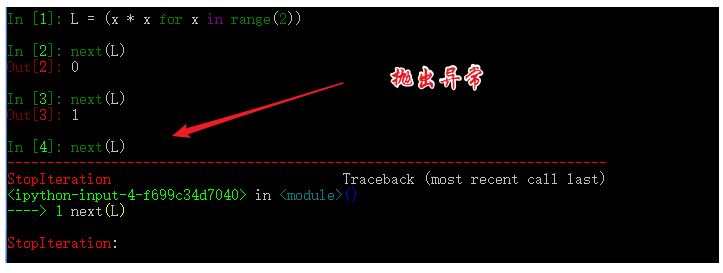

所以我们在自己定义一个生成器的时候，我们也应该在不满足生成元素条件的时候，抛出异常。
拿上面的代码来修改一下。

In [11]:
def mygen(n):
    now = 0
    while now < n:
        yield now
        now += 1
    raise StopIteration

if __name__ == '__main__':
    gen = mygen(2)
    next(gen)
    next(gen)
    next(gen)

C:\Users\58322\Miniconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: generator 'mygen' raised StopIteration
  if sys.path[0] == '':


StopIteration: 

# 从生成器过渡到协程：yield

通过上面的介绍，我们知道生成器为我们引入了暂停函数执行（yield）的功能。当有了暂停的功能之后，人们就想能不能在生成器暂停的时候向其发送一点东西（其实上面也有提及：send(None)）。这种向暂停的生成器发送信息的功能通过 PEP 342 进入 Python 2.5 中，并催生了 Python 中协程的诞生。根据 wikipedia 中的定义

> 协程是为非抢占式多任务产生子程序的计算机程序组件，协程允许不同入口点在不同位置暂停或开始执行程序。

注意从本质上而言，协程并不属于语言中的概念，而是编程模型上的概念。

协程和线程，有相似点，多个协程之间和线程一样，只会交叉串行执行；也有不同点，线程之间要频繁进行切换，加锁，解锁，从复杂度和效率来看，和协程相比，这确是一个痛点。协程通过使用 yield 暂停生成器，可以将程序的执行流程交给其他的子程序，从而实现不同子程序的之间的交替执行。

下面通过一个简明的演示来看看，如何向生成器中发送消息。

In [12]:
def jumping_range(N):
    index = 0
    while index < N:
        # 通过send()发送的信息将赋值给jump
        jump = yield index
        if jump is None:
            jump = 1
        index += jump

if __name__ == '__main__':
    itr = jumping_range(5)
    print(next(itr))
    print(itr.send(2))
    print(next(itr))
    print(itr.send(-1))

0
2
3
2


# 为何要使用协程


在开始讲yield from 之前，我想先解决一下这个给很多人带来困惑的问题。

举个例子。
假如我们做一个爬虫。我们要爬取多个网页，这里简单举例两个网页(两个spider函数)，获取HTML（耗IO耗时），然后再对HTML对行解析取得我们感兴趣的数据。

我们的代码结构精简如下：
```
def spider_01(url):
    html = get_html(url)
    ...
    data = parse_html(html)

def spider_02(url):
    html = get_html(url)
    ...
    data = parse_html(html)
```
我们都知道，get_html()等待返回网页是非常耗IO的，一个网页还好，如果我们爬取的网页数据极其庞大，这个等待时间就非常惊人，是极大的浪费。

聪明的程序员，当然会想如果能在get_html()这里暂停一下，不用傻乎乎地去等待网页返回，而是去做别的事。等过段时间再回过头来到刚刚暂停的地方，接收返回的html内容，然后还可以接下去解析parse_html(html)。

利用常规的方法，几乎是没办法实现如上我们想要的效果的。所以Python想得很周到，从语言本身给我们实现了这样的功能，这就是yield语法。<span class="burk">可以实现在某一函数中暂停的效果</span>。

试着思考一下，假如没有协程，我们要写一个并发程序。可能有以下问题


















yield from 是在Python3.3才出现的语法。所以这个特性在Python2中是没有的。

yield from 后面需要加的是可迭代对象，它可以是普通的可迭代对象，也可以是迭代器，甚至是生成器。

简单应用：拼接可迭代对象#
我们可以用一个使用yield和一个使用yield from的例子来对比看下。

使用yield


In [15]:
# 字符串
astr='ABC'
# 列表
alist=[1,2,3]
# 字典
adict={"name":"wangbm","age":18}
# 生成器
agen=(i for i in range(4,8))

def gen(*args, **kw):
    for item in args:
        for i in item:
            yield i

new_list=gen(astr, alist, adict,agen)
print(list(new_list))
# ['A', 'B', 'C', 1, 2, 3, 'name', 'age', 4, 5, 6, 7]

['A', 'B', 'C', 1, 2, 3, 'name', 'age', 4, 5, 6, 7]


In [16]:
# 字符串
astr='ABC'
# 列表
alist=[1,2,3]
# 字典
adict={"name":"wangbm","age":18}
# 生成器
agen=(i for i in range(4,8))

def gen(*args, **kw):
    for item in args:
        yield from item

new_list=gen(astr, alist, adict, agen)
print(list(new_list))
# ['A', 'B', 'C', 1, 2, 3, 'name', 'age', 4, 5, 6, 7]

['A', 'B', 'C', 1, 2, 3, 'name', 'age', 4, 5, 6, 7]
